## Astro 304 "Galaxies"


### Scaling relations

Observed galaxies exhibit several tight relations between their different observed properties. Such relations are often referred to as *scaling relations* because they describe how one galaxy property "scales" as a function of another property. Such tight relations are of paramount importance because they inform us about regularities during galaxy formation and connections between physical processes that affect different properties. 

Below are scripts that produce plots of several most famous scaling relations. Data files used by the scripts is located in the <a href="http://astro.uchicago.edu/~andrey/classes/a304s18/data/">data directory</a> we used in this class.

You can find a more detailed discussion of scaling relations and their theoretical interpretation in S 1.10 of the <a href="http://astro.uchicago.edu/~andrey/classes/a304s18/a304_galaxies_notes.pdf">notes</a>

In [1]:
# setup notebook for inline figures
#%matplotlib inline
%matplotlib notebook
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

%load_ext autoreload
%autoreload 2


In [2]:
from code.setup.setup import data_home_dir
from code.plot_utils import plot_2d_dist, compute_inverse_Vmax
from colossus.cosmology import cosmology

def read_GAMA(fname):
    import pyfits
    hdulist = pyfits.open(fname)
    return np.asarray(hdulist[1].data)
    
data = read_GAMA(data_home_dir()+"GAMA_DR2_full.fits")

cosmo = cosmology.setCosmology('WMAP9')

z_min = 0.001; z_max = 0.6
m_min = 10.5; m_max = 19.0
mpetro = data['PETROMAG_R'] - data['EXTINCTION_R']

data = data[(mpetro > m_min) & (mpetro < m_max)]; 
data = data[data['Z_HELIO'] > z_min];   
data = data[data['Z_HELIO'] < z_max]

mpetro = data['PETROMAG_R'] - data['EXTINCTION_R']
zg = data['Z_TONRY']

vmaxim = compute_inverse_Vmax(mpetro, zg, m_min=m_min, m_max=m_max, cosmomodel='WMAP9')
vmaxim = vmaxim / np.sum(vmaxim)
lMstar = data['logmstar']
Mstar = np.power(10.,lMstar)
r50 = data['GAL_RE_R']
r90 = data['GAL_R90_R']
sfr = data['SFR']
lsfr = np.log10(sfr)
# metallicity
Z = data['metal']/0.0126 # normalize to solar according to Asplund et al. (2004)
lZ = np.log10(Z)

# compute angular diameter distances
d_A = cosmo.luminosityDistance(zg)/cosmo.h/(1.+zg)
r50 = r50*np.pi*d_A*1000.0/(180.*3600.)
# SFR -> SFR/kpc^2, M*->Sigma_* in Msun/kpc^2
ssfr = sfr/(np.pi*r50**2)
smstar = 0.5*Mstar/(np.pi*r50**2)
lssfr = np.log10(ssfr); lsmstar = np.log10(smstar)

C:\Users\h2_sf\Canopy2\User\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in log10
C:\Users\h2_sf\Canopy2\User\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


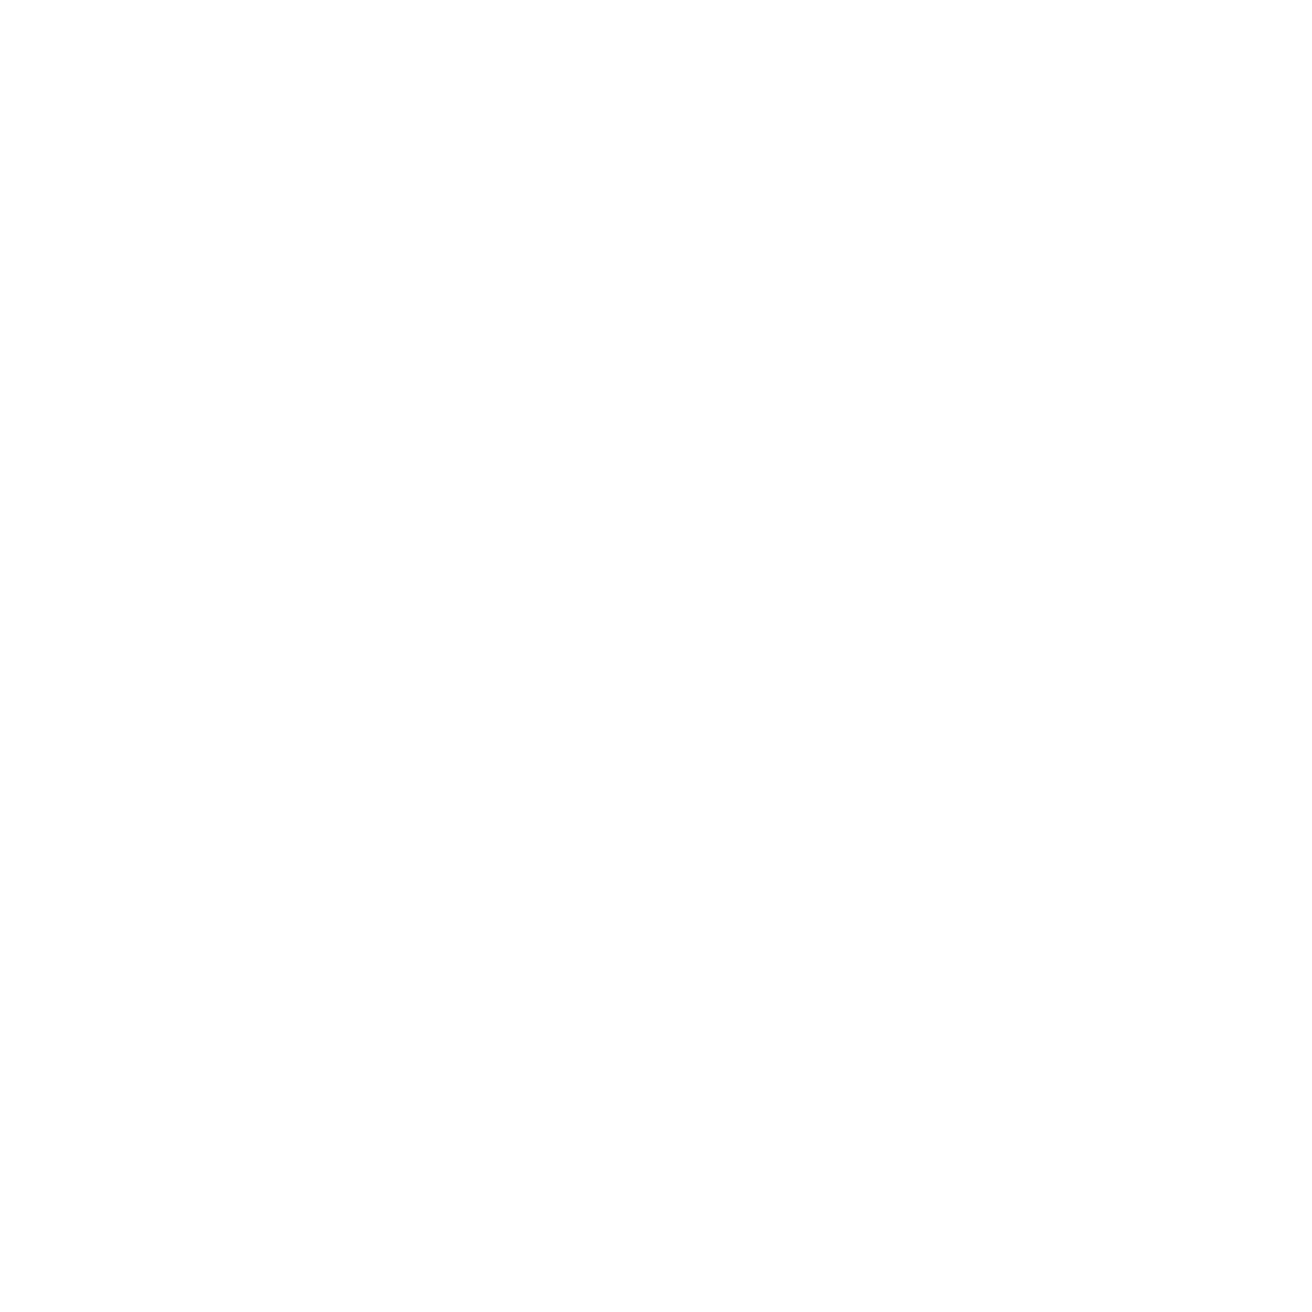

In [3]:
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()
%matplotlib qt

# plot the SFR-Z-M* distribution in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$\log_{10}{\rm SFR}\ (M_\odot\,\mathrm{yr}^{-1})$'); 
ax.set_ylabel(r'$\log_{10} Z/Z_\odot$'); 
ax.set_zlabel(r'$\log_{10} M_*\ (M_\odot)$')
ax.set_xlim(-2,2.0); ax.set_ylim(-1.0,1.0); ax.set_zlim(7.,12.)


#select only star forming sequence galaxies
ssfr = sfr/10.**lMstar
isel = ssfr>1.e-10
lsfrs = lsfr[isel]; lZs = lZ[isel]; lMss = lMstar[isel]
#subselect for interactive speed
iran = np.random.randint(0,np.size(lsfrs),2000)

ax.scatter(lsfrs[iran], lZs[iran], lMss[iran], c='b', marker='.')

plt.show()

## "Dynamical" scaling relations

### The Faber-Jackson relation

The Faber-Jackson relation <a href="http://adsabs.harvard.edu/abs/1976ApJ...204..668F">Faber & Jackson (1976)</a> relation between galaxy luminosity and stellar velocity dispersion. Velocity dispersion is an analoguous quantity in spheroidal galaxies to the rotation velocity of disk galaxies, although the two are not quite the same. 

Let's look at the Faber-Jackson relation for the spheroidal galaxies in the SDSS sample. 

In [4]:
# import Benedikt Diemer's colossus package
from colossus.cosmology import cosmology
# set cosmology to the best values from 9-year WMAP data
cosmo = cosmology.setCosmology('WMAP9')

# read in the relevant data from Meert et al. (2015) catalogs
from code.read_data import read_meert_catalog
sdata, mdata, mnpdata, phot_r, mdatag, mnpdatag, morph = read_meert_catalog(phot_type = 3)


670722 galaxies in Meert et al. sample initially


In [5]:
from code.plot_utils import plot_2d_dist
#
# assigned probability for galaxy to be of particular type from Huertas-Company et al. 2011 classification
#
pSab = morph['probaSab']; pScd = morph['probaScd']; pS0  = morph['probaS0']
pEll  = morph['probaEll']
mr = mdata['m_tot']; extm = mnpdata['extinction']; 
mg = mdatag['m_tot']; extmg = mnpdatag['extinction']; 
gr = mg - mr - extmg + extm

isph = (pEll>0.8) & (sdata['velDisp']>10.0) & (gr<1.5)

emdata = mdata[isph]; esdata = sdata[isph]; ephot_r = phot_r[isph]
emnpd = mnpdata[isph]; emdatag = mdatag[isph]; emnpdg = mnpdatag[isph];
# 1d velocity dispersion measured from SDSS spectrum
s = esdata['velDisp']; ls = np.log10(s)

z = esdata['z'];
mr = emdata['m_tot']; extm = emnpd['extinction']; kcorr = emnpd['kcorr']
mg = emdatag['m_tot']; extmg = emnpdg['extinction']; 

gr = mg - mr - extmg + extm

# compute luminosity distance in Mpc
d_Lm = cosmo.luminosityDistance(z)/cosmo.h

# abs. magnitude from the Meert et al. photometry using fit specified by phot_type above
# corrected for extinction, evolution, and k-correction
Mr = mr - 5.0*np.log10(d_Lm/1e-5) - extm + 1.3*z - kcorr;
Lr = 0.4*(4.67-Mr)
MsLr = -.306 + 1.097*gr - 0.1
lMs = Lr + MsLr
Ms = 10.**lMs

In [6]:
def perc84(x):
    return np.percentile(x,84.0)
def perc16(x):
    return np.percentile(x,16.0)


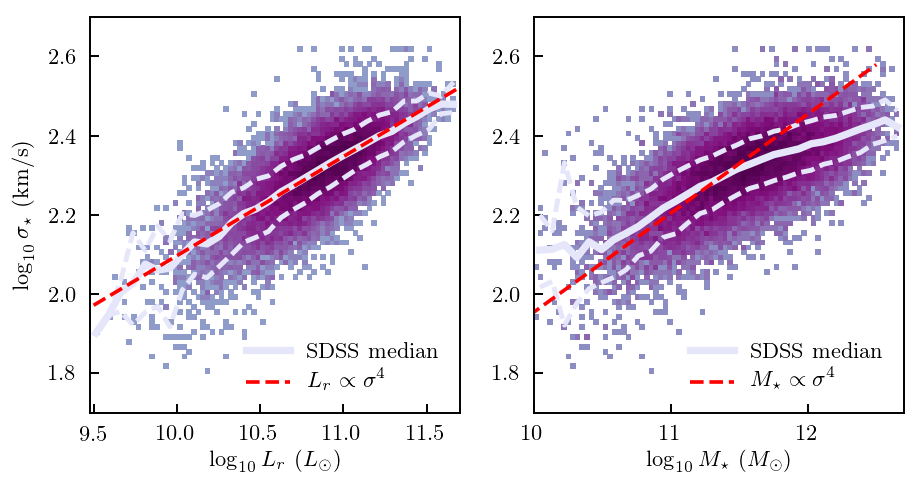

In [7]:
%matplotlib inline
plot_pretty()

#
# now plot the Faber-Jackson relation
#
fig, ax = plt.subplots(1,2,figsize=(6, 3))

#ax[0].set_xlabel(r'$L_r\ (L_\odot)$'); ax[0].set_ylabel(r'$\sigma\ (\mathrm{km/s})$')
ylim = [50.,500.]; xlim = [3.e9, 5.e11]
xlim = np.log10(xlim); ylim = np.log10(ylim)
#xlim = [np.log10(3.e9), np.log10(5.e11)]
#ylim = [np.log10(50.), np.log10(500.)]
ax[0].set_ylim(ylim); #ax[0].set_yscale('log')
ax[0].set_xlim(xlim); #ax[0].set_xscale('log')

nxbins = 81; nybins = 81; 
#xlim = np.log10(xlim); ylim = np.log10(ylim)
plot_2d_dist(Lr, ls, xlim, ylim, 
             nxbins, nybins, weights=None, 
             xlabel=r'$\log_{10} L_r\ (L_\odot)$', ylabel= r'$\log_{10}\sigma_\star\ (\mathrm{km/s})$', 
             fig_setup=ax[0])

from scipy.stats import binned_statistic
smed, ibedges, NMbins = binned_statistic(Lr,ls,statistic='median',bins=30,range=xlim)
    
s16, ibedges, NMbins = binned_statistic(Lr,ls,statistic=perc16,bins=30,range=xlim)
s84, ibedges, NMbins = binned_statistic(Lr,ls,statistic=perc84,bins=30,range=xlim)

ibins = 0.5*(ibedges[1:] + ibedges[:-1])

ax[0].plot(ibins, smed,c='lavender',lw=3.0, label=r'$\mathrm{SDSS\ median}$')
ax[0].plot(ibins, s16,'--',c='lavender',lw=2.0)
ax[0].plot(ibins, s84,'--',c='lavender',lw=2.0)

# plot the L~sigma^4 power law advocated by Faber & Jackson (1976)
x = np.linspace(9.5, 11.7, 100)
y = 125.*10**((x-10)/4.)

ax[0].plot(x, np.log10(y),'--', c='r', lw=1.5, label=r'$L_r\propto \sigma^4$')
ax[0].legend(frameon=False, loc='lower right',fontsize=9)

#
# now as a function of stellar mass
#
ax[1].set_xlabel(r'$\log_{10}M_\star\ (M_\odot)$'); 
#ax[1].set_ylabel(r'$\sigma\ (\mathrm{km/s})$')
ylim = [50.,500.]; xlim = [1.e10, 5.e12]
xlim = np.log10(xlim); ylim = np.log10(ylim)
ax[1].set_xlim(xlim); ax[1].set_ylim(ylim); 

nxbins = 81; nybins = 81; 
plot_2d_dist(lMs, ls, xlim, ylim, 
             nxbins, nybins, weights=None, 
             xlabel=r'$\log_{10}M_\star\ (M_\odot)$', ylabel= r' ', 
             fig_setup=ax[1])

from scipy.stats import binned_statistic
smed, ibedges, NMbins = binned_statistic(lMs,ls,statistic='median',bins=30,range=xlim)
def perc84(x):
    return np.percentile(x,84.0)
def perc16(x):
    return np.percentile(x,16.0)
    
s16, ibedges, NMbins = binned_statistic(lMs,ls,statistic=perc16,bins=30,range=xlim)
s84, ibedges, NMbins = binned_statistic(lMs,ls,statistic=perc84,bins=30,range=xlim)

ibins = 0.5*(ibedges[1:] + ibedges[:-1])

#plt.scatter(Mr, s, marker='.', color='blue', s=0.5, alpha=0.5)
ax[1].plot(ibins, smed,c='lavender',lw=3.0, label=r'$\mathrm{SDSS\ median}$')
ax[1].plot(ibins, s16,'--',c='lavender',lw=2.0)
ax[1].plot(ibins, s84,'--',c='lavender',lw=2.0)

# plot the L~sigma^4 power law advocated by Faber & Jackson (1976)
x = np.linspace(9.5, 12.5, 100)
y = 160.*10**((x-11)/4.)

ax[1].plot(x, np.log10(y),'--', c='r', lw=1.5, label=r'$M_\star\propto \sigma^4$')
ax[1].legend(frameon=False, loc='lower right',fontsize=9)

#plt.savefig('fig/fj_relation_sdss.pdf',bbox_inches='tight')

plt.show()

We can see that the relation is only close to the power law for the luminosity-velocity dispersion of galaxies. When we convert luminosity to stellar mass, the relation is no longer a power law. 

### Fundamental plane of spheroidal galaxies

<a href="http://adsabs.harvard.edu/abs/1987ApJ...313...42D">Dressler et al. (1987)</a> and <a href="http://adsabs.harvard.edu/abs/1987ApJ...313...59D">Djorgovski & Davis (1987)</a> have discovered that spheroidal galaxies in the 3D space formed by the galaxy half-light radius, surface brightness, and velocity dispersion (or, equivalently, by luminosity, surface brightness, and velocity dispersion) are distributed along a manifold, which they dubbed the <i>fundamental plane</i>. The fundamental part is due to the low scatter perpendicular to the plane: these authors interpreted the combination of parameters that gives tight power law correlation between $R_{\rm eff}$ and the combination of the surface brightness and velocity dispersion as indicating the fundamental property that shapes sizes of spheroidal galaxies. 

 
fitting ``fundamental'' plane to the sample
    log(Re)=a*mu + b*log(sigma) + const
plane fit results: a = 0.28, b = 0.99
compare to Djorgovsky & Davis 1987: a=0.36, b=1.39
compare to Dressler et al. 1987: a=0.33, b=1.33
 


<IPython.core.display.Javascript object>


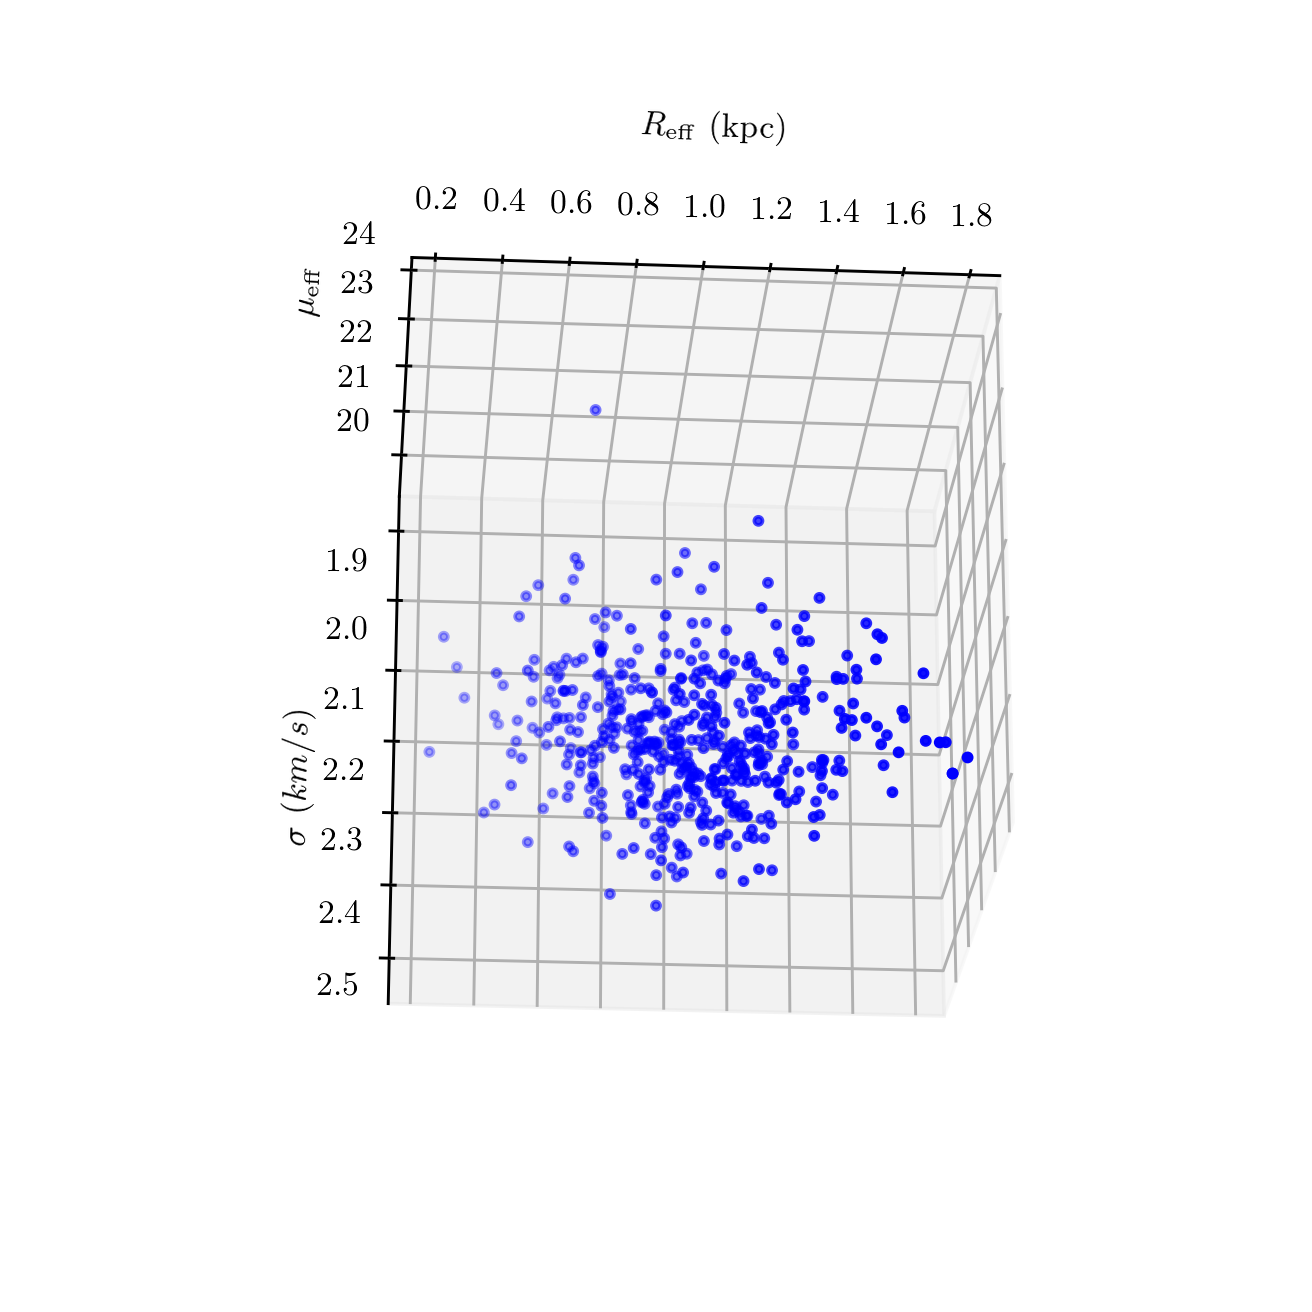

In [4]:
import numpy as np

#%matplotlib qt
#%matplotlib inline
%matplotlib notebook
    
Reff = emdata['r_tot']; mrm = emdata['m_tot']
# cut galaxies with small Reff which may be affected by seeing
isel = (Reff > 1.)
mrs = mrm[isel]; lss = ls[isel]
d_Lms = d_Lm[isel]; zs=z[isel]; Reff=Reff[isel]
# surface brightness in mag/arcsec^2
sb = mrs - 2.5*np.log10(0.5) + 2.5*np.log10(np.pi*(Reff)**2)
# arcsec -> kpc
Reff = Reff * d_Lms/(1.0+zs) * 1.e3 * np.pi/(180.*3600.)


def fitPlaneSVD(XYZ):
    [rows,cols] = XYZ.shape
    # Set up constraint equations of the form  AB = 0,
    # where B is a column vector of the plane coefficients
    # in the form b(1)*X + b(2)*Y +b(3)*Z + b(4) = 0.
    p = (np.ones((rows,1)))
    AB = np.hstack([XYZ,p])
    [u, d, v] = np.linalg.svd(AB,0)        
    B = v[3,:];                    # Solution is last column of v.
    nn = np.linalg.norm(B[0:3])
    B = B / nn
    return B

# quick least squares fit of the plane to the sample using singular value decomposition
lR = np.log10(Reff)
XYZ = np.array(zip(lR,sb,lss))
b = fitPlaneSVD(XYZ)

print " "
print "fitting ``fundamental'' plane to the sample"
print "    log(Re)=a*mu + b*log(sigma) + const"
print 'plane fit results: a = %.2f, b = %.2f' % (-b[1]/b[0], -b[2]/b[0])
print "compare to Djorgovsky & Davis 1987: a=0.36, b=1.39" 
print "compare to Dressler et al. 1987: a=0.33, b=1.33" 
print " "

# plot the fundamental plane in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$R_{\rm eff}\ (\mathrm{kpc})$'); ax.set_ylabel(r'$\mu_{\rm eff}$'); ax.set_zlabel(r'$\sigma\ (km/s)$')
#ax.set_xlim(-Rmax/2,Rmax/2); ax.set_ylim(-Rmax/2,Rmax/2); ax.set_zlim(-Rmax/2,Rmax/2)


#subselect for interactive speed
iran = np.random.randint(0,np.size(lR),500)

ax.scatter(lR[iran], sb[iran], lss[iran], c='b', marker='.')
#plt.hold()
#plt.show()
#


### The Tully-Fisher relation

An equivalent of the Faber-Jackson relation for disk galaxies is one of the most famous scaling relations is the *Tully-Fisher relation* (TFR) between galaxy rotation velocity of gas (usually measured at $2.2R_d$ where $R_d$ is disk exponential scale length) and its luminosity (<a href="http://adsabs.harvard.edu/abs/1977A%26A....54..661T">Tully & Fisher 1977</a>). 

A related relation is the *baryonic Tully-Fisher relation* (BTFR) between rotation velocity and "baryon mass" (gas+star mass), which was first considered by <a href="http://adsabs.harvard.edu/abs/2005ApJ...632..859M">McGaugh (2005)</a>.
This relation is extensively used in a variety of areas, including 1) distance measurements to galaxies, 2) constraints on galaxy formation models, 3) constraints on alternative gravity models, 4) constraints on the mass-to-light ratios and initial mass function of stars in galaxies, etc.

The plots below show the Tully-Fisher and baryonic Tully-Fisher relation of dwarf and disk galaxies from the sample compiled by <a href="http://adsabs.harvard.edu/abs/2016arXiv160202757B">Bradford et al. (2016)</a> 

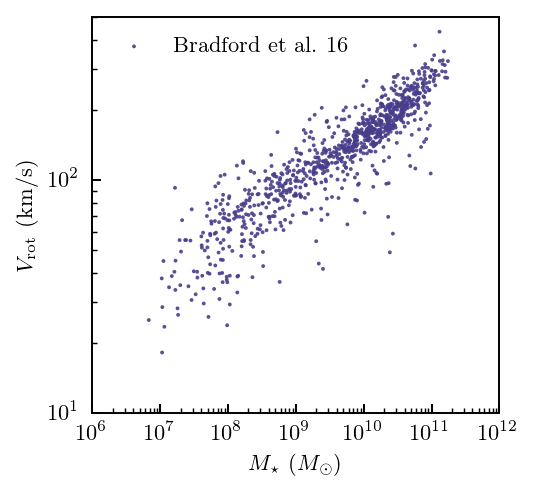

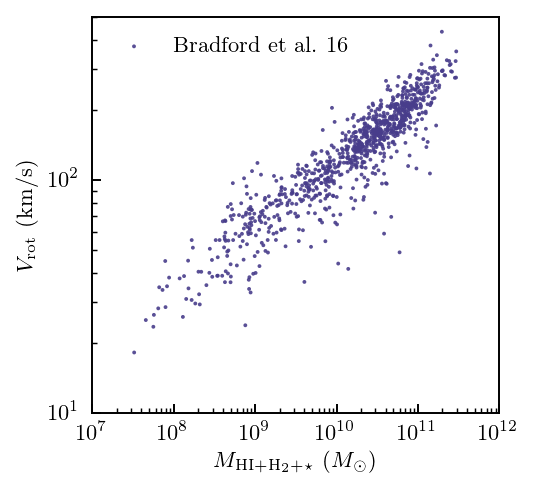

In [29]:
import pyfits
from code.setup.setup import data_home_dir

bf1 = pyfits.open(data_home_dir()+'figure_1_bradford_2016.fits')[1].data
# if you want to see what's in the fits table, uncomment
bf1h = pyfits.open('data/figure_1_bradford_2016.fits')[1].header
#print(bf1h)

mbbar = bf1['MBARYON']; embar = bf1['MBARYON_ERR']
w20b = bf1['VW20I']; ew20b = bf1['VW20I_ERR']
mbs = bf1['MSTAR'];
mbbar += 0.1238 # He correction

# TFR
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([1.e6,1.e12]); plt.ylim([10.,500.])
plt.ylabel(r'$V_{\rm rot}\ \mathrm{(km/s)}$'); plt.xlabel(r'$M_{\rm \star}\ {(M_\odot)}$')
plt.scatter(10.**mbs,w20b,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label=r'$\mathrm{Bradford\ et\ al.\ 16}$')
plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()

# BTFR
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([1.e7,1.e12]); plt.ylim([10.,500.])
plt.ylabel(r'$V_{\rm rot}\ \mathrm{(km/s)}$'); plt.xlabel(r'$M_{\rm HI+H_2+\star}\ {(M_\odot)}$')
plt.scatter(10.**mbbar,w20b,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label=r'$\mathrm{Bradford\ et\ al.\ 16}$')
plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()